## EDUNET FOUNDATION - Self-Practice Exercise Notebook

### LAB 12 - Implementing Random Forest Concepts in Python

### Random Forest Algorithm

Random Forest is one of the most popular and commonly used algorithms by Data Scientists. Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

Random forest is a versatile machine learning algorithm developed by Leo Breiman and Adele Cutler. It leverages an ensemble of multiple decision trees to generate predictions or classifications. By combining the outputs of these trees, the random forest algorithm delivers a consolidated and more accurate result.

Learning Objectives

- Learn the working of random forest with an example
- Understand the impact of different hyperparameters in random forest
- Implement Random Forest on a classification problem using scikit-learn

#### Working of Random Forest Algorithm

Before understanding the working of the random forest algorithm in machine learning, we must look into the ensemble learning technique. Ensemble simplymeans combining multiple models. Thus a collection of models is used to make predictions rather than an individual model.

In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline


Ensemble uses two types of methods:   

    1. Bagging– It creates a different training subset from sample training data with replacement & the final output is based on majority voting. For example,  Random Forest.

    2. Boosting– It combines weak learners into strong learners by creating sequential models such that the final model has the highest accuracy. For example,  ADA BOOST, XG BOOST.
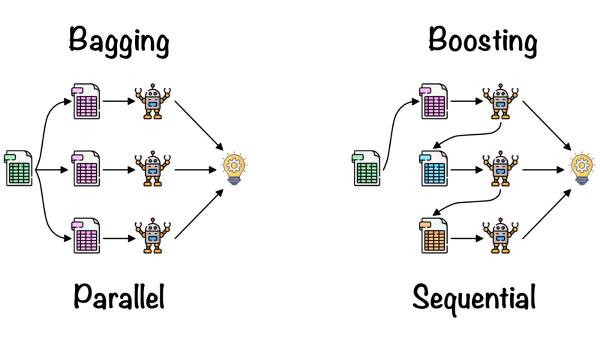

Steps Involved in Random Forest Algorithm:                   
Step 1: In the Random forest model, a subset of data points and a subset of features is selected for constructing each decision tree. Simply put, n random records and m features are taken from the data set having k number of records.

Step 2: Individual decision trees are constructed for each sample.

Step 3: Each decision tree will generate an output.

Step 4: Final output is considered based on Majority Voting or Averaging for Classification and regression, respectively.

#### Important Hyperparameters in Random Forest
Hyperparameters are used in random forests to either enhance the performance and predictive power of models or to make the model faster.

Hyperparameters to Increase the Predictive Power
n_estimators: Number of trees the algorithm builds before averaging the predictions.

max_features: Maximum number of features random forest considers splitting a node.

mini_sample_leaf: Determines the minimum number of leaves required to split an internal node.

criterion: How to split the node in each tree? (Entropy/Gini impurity/Log Loss)

max_leaf_nodes: Maximum leaf nodes in each tree

Link for heart_v2.csv dataset
https://drive.google.com/file/d/1WHoNc3xe28lsT7AC4DWZWvYsuAitCDDk/view?usp=drive_link

Now let’s implement Random Forest in scikit-learn.

**1. Let’s import the libraries.**

In [15]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

**2. Import the dataset.**

   age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0


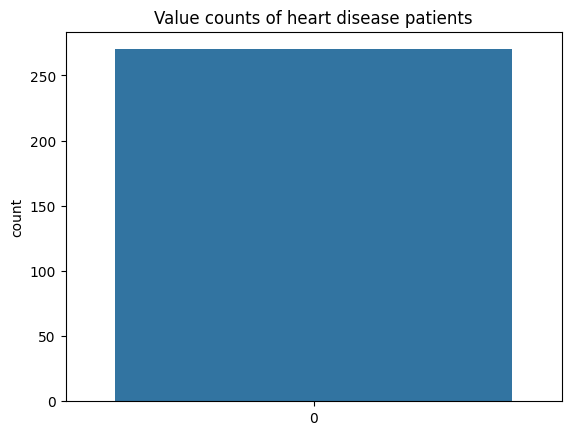

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('heart_v2.csv')
print(df.head())
sns.countplot(df['heart disease'])
plt.title('Value counts of heart disease patients')
plt.show()

**3. Putting Feature Variable to X and Target variable to y.**

In [3]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)
# Putting response variable to y
y = df['heart disease']

**4. Train-Test-Split is performed**

In [4]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

**5. Let’s import RandomForestClassifier and fit the data.**

In [6]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [7]:
# checking the oob score
classifier_rf.oob_score_


0.656084656084656

**6. Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.**

In [8]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [9]:
grid_search.best_score_

0.6985815602836879

In [10]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

**7. Now, let’s visualize**

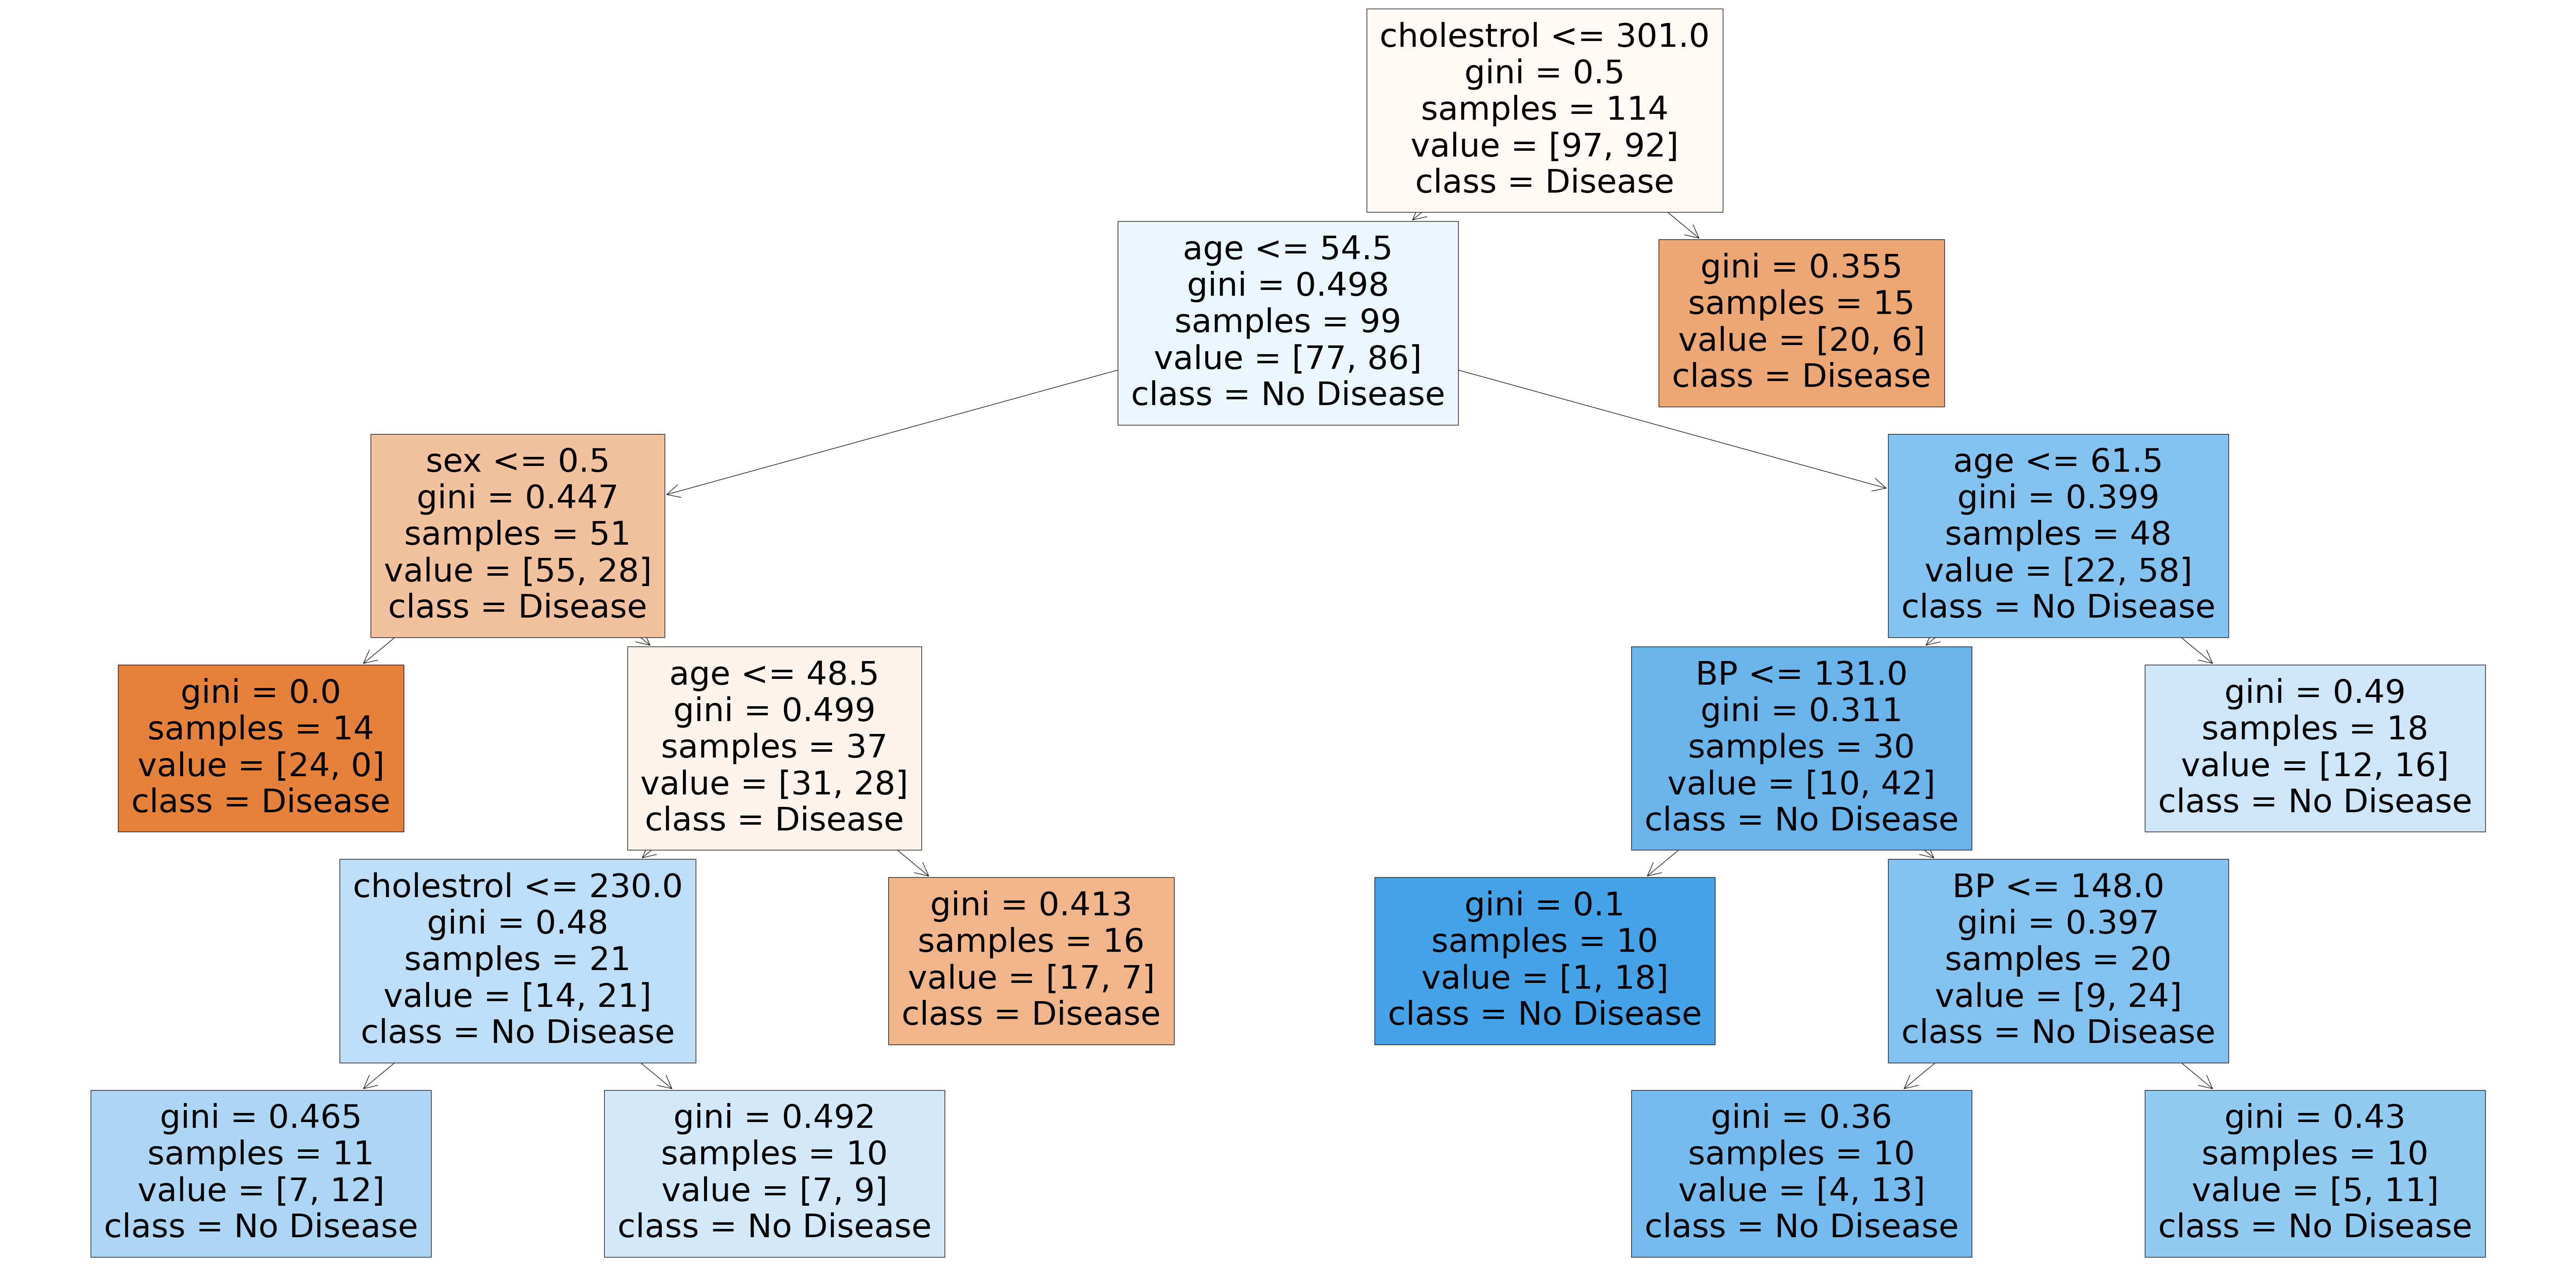

In [11]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

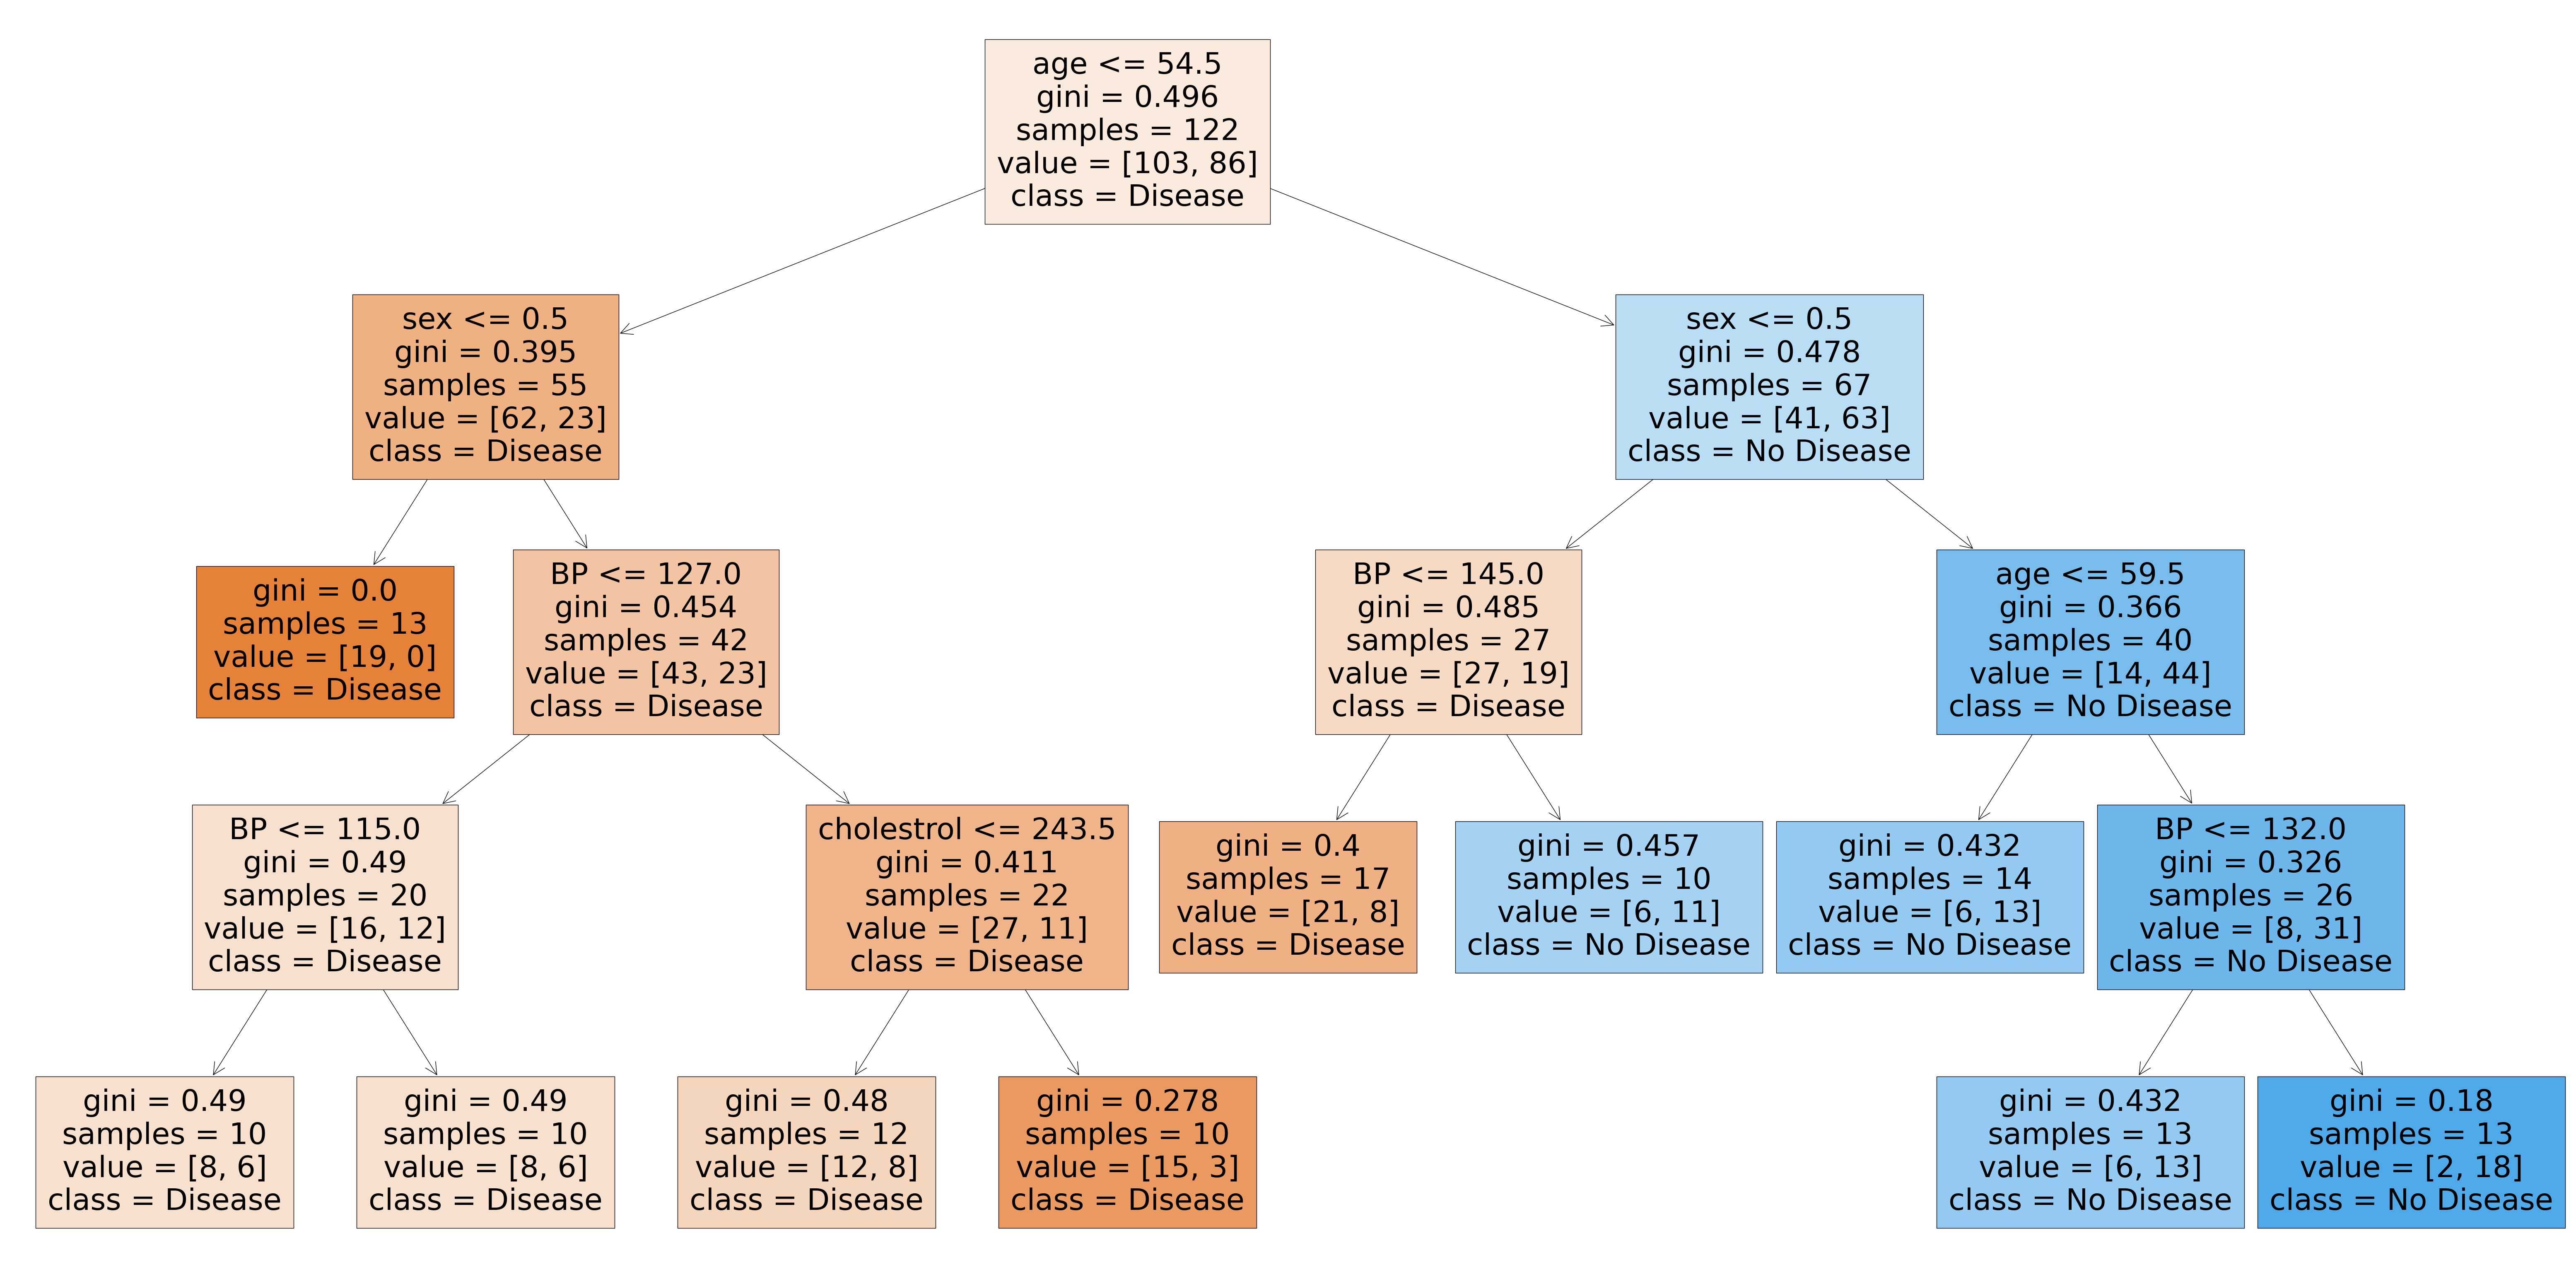

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

The trees created by estimators_[5] and estimators_[7] are different. Thus we can say that each tree is independent of the other.

**8. Now let’s sort the data with the help of feature importance**

In [13]:
rf_best.feature_importances_

array([0.46128487, 0.2180848 , 0.13174619, 0.18888413])

In [14]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)


,Varname,Imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746
